
# EDA Dataset Merge
- In this EDA, we start by importing the dataframes with which we will merge a new table thanks to a common field they both have called 'artist'. We will then proceed with the appropriate exploration and cleaning of this new dataset.
- It's important to clarify that the datasets we import have already been cleaned and analyzed in their respective EDAs, but here we will also make certain changes that have not been imported correctly, such as data type conversion.



## Library Importation
### Used for Database Connection and Management
- Sqlalchemy and create_engine: These libraries help us to interact with our MySQL database from language files and assist us with the process of creating connections and queries to the tables of our databases.
- Dotenv, load_dotenv, and os: Libraries that assist us in handling credentials in public files like this notebook. Since we are using environment variables for the connection with MySQL, these libraries help us to use our credentials by calling them from a ".env" file.

### Used for Exploratory and Statistical Analysis of the Dataset
- Pandas and Matplotlib: High-performance libraries for data handling and exploratory data analysis, allowing for thorough and organized cleaning of our datasets. Additionally, they provide a wide range of statistical and graphical analysis capabilities, complemented by Matplotlib.
- Pickle: A widely used library for data transfer and processes within the Python language, offering flexibility and easy data persistence.
- re: Library that allows us to work with regular expressions, find patterns, and search for occurrences among records, thus facilitating cleaning in case of repeated expressions among records that make many of them dirty and difficult to identify in a large dataset.

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pickle
import pymysql
import re

## Data Importation
- In this analysis, we start by importing the necessary dataframes to perform the merge. To maintain consistency and efficiency, we chose to use the Python pickle library to load the preprocessed dataframes that we had previously saved and analyzed in their respective EDAs, referring to the Grammy and Spotify datasets.


In [2]:
grammy_df = pd.read_pickle('grammy_awards_df.pkl')
spotify_df = pd.read_pickle('spotify_dataset.pkl')

## Individual Fields of Each Dataset
- After importing the datasets, we aim to confirm whether the data transfer was successful. Additionally, we will analyze if any visible changes made separately in each dataset were also successfully imported into this notebook.

In [3]:
print(grammy_df.info())
print(spotify_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          834 non-null    int64              
 1   title         834 non-null    object             
 2   published_at  834 non-null    datetime64[ns, UTC]
 3   updated_at    834 non-null    datetime64[ns, UTC]
 4   category      834 non-null    object             
 5   nominee       834 non-null    object             
 6   artist        834 non-null    object             
 7   workers       834 non-null    object             
 8   img           834 non-null    object             
 9   winner        834 non-null    int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(6)
memory usage: 71.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 39120 entries, 0 to 113992
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  --

## Creation and Criteria of the Merge
- This merge was performed using the common field 'artists' from the Spotify dataset and the field 'artist' from the Grammy dataset. It takes the common records between the two datasets and creates a new field called 'artist' that contains all those common records.
- Typically, merges between two or more datasets are done if they share a common field. In our case, we used that criterion, but we also aimed for an analysis in which the artist records that shared information between both datasets were included in this merge. This way, they are complemented not only by the common field but also by the information that each dataset can offer for each artist in common.

In [4]:
#Perform the merge using the 'artist' column from grammy_df and 'artists' from spotify_df as the joining keys
merged_df = pd.merge(grammy_df, spotify_df, left_on='artist', right_on='artists', how='inner')

#Create a new field 'artist' containing the matching values between 'artist' and 'artists'
merged_df['artist'] = merged_df['artist'].combine_first(merged_df['artists'])

merged_df.drop(columns=['artists'], inplace=True)

# Visualize our new dataset

In [5]:
print(merged_df.head())
print(merged_df.info())

   year                              title              published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
1  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
2  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
3  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
4  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   

                 updated_at            category  nominee         artist  \
0 2020-05-19 12:10:28+00:00  Record Of The Year  Bad Guy  Billie Eilish   
1 2020-05-19 12:10:28+00:00  Record Of The Year  Bad Guy  Billie Eilish   
2 2020-05-19 12:10:28+00:00  Record Of The Year  Bad Guy  Billie Eilish   
3 2020-05-19 12:10:28+00:00  Record Of The Year  Bad Guy  Billie Eilish   
4 2020-05-19 12:10:28+00:00  Record Of The Year  Bad Guy  Billie Eilish   

                                             workers  \
0  Finneas O'Connell, producer; Rob Kinelski & Fi...   
1  F

## Verification of the absence of dirty records in the new dataset
- One of the cleanings that was more rigorous was the one we did in the Spotify dataset, and we aimed to prioritize that it would not end up being affected by the merge between both datasets in the artist field.


In [6]:
album_names_unique = merged_df['artist'].unique()
album_names_unique_sorted = sorted(album_names_unique)

for album_name in album_names_unique_sorted:
    print(album_name)

Adele
Alanis Morissette
Alejandro Sanz
Alicia Keys
Amy Winehouse
Annie Lennox
Aphex Twin
Ariana Grande
Bacilos
Billie Eilish
Billy Joel
Bob Dylan
Bon Iver
Bonnie Raitt
Bonobo
Brandi Carlile
Britney Spears
Bruno Mars
Cage The Elephant
Cardi B
Carolina Chocolate Drops
Casting Crowns
Celia Cruz
Chaka Khan
Chris Brown
Chris Stapleton
Chris Tomlin
Christopher Cross
Coldplay
Dolly Parton
Drake
Ed Sheeran
Eliane Elias
Eminem
Emmylou Harris
Eric Clapton
Etta James
Faith Hill
Fleetwood Mac
Foo Fighters
Frank Ocean
George Benson
George Strait
Gilberto Gil
Gilberto Santa Rosa
Glen Campbell
Gloria Gaynor
Green Day
Gregory Porter
Greta Van Fleet
Grupo Fantasma
Irma Thomas
Jimmy Cliff
Joan Sebastian
Joe Jackson
John Denver
John Legend
John Mayer
Juanes
Justice
Kacey Musgraves
Korn
Kylie Minogue
LCD Soundsystem
La Roux
Lady Gaga
Lana Del Rey
Laura Sullivan
Lauren Daigle
Led Zeppelin
Lil Nas X
Lionel Richie
Lizzo
Loretta Lynn
Lou Reed
Luis Enrique
Madonna
Marc Anthony
Michael Jackson
Nancy Wilson
Nata

## Data type change for different fields
### This data type change was prioritized after the merge for some fields to ensure their behavior in a comprehensive analysis after the merge of both datasets
- Convert 'published_at' and 'updated_at' to datetime data type
- Convert 'winner' to boolean data type
- Convert 'Key' and 'mode' to categorical data type
- Convert 'duration_ms' to numeric data type (can be int or float)
- Convert 'time_signature' and 'track_genre' to categorical data type

In [6]:
merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])
merged_df['updated_at'] = pd.to_datetime(merged_df['updated_at'])

merged_df['winner'] = merged_df['winner'].astype(bool)

merged_df['key'] = merged_df['key'].astype('category')
merged_df['mode'] = merged_df['mode'].astype('category')

merged_df['duration_ms'] = merged_df['duration_ms'].astype(int)

merged_df['time_signature'] = merged_df['time_signature'].astype('category')
merged_df['track_genre'] = merged_df['track_genre'].astype('category')


## Verification of data type changes
- This verification allows us to see how successfully the data type changes were made and specifically helps us understand that the datetime data type change is maintained even after the merge.


In [7]:
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   year              2716 non-null   int64              
 1   title             2716 non-null   object             
 2   published_at      2716 non-null   datetime64[ns, UTC]
 3   updated_at        2716 non-null   datetime64[ns, UTC]
 4   category          2716 non-null   object             
 5   nominee           2716 non-null   object             
 6   artist            2716 non-null   object             
 7   workers           2716 non-null   object             
 8   img               2716 non-null   object             
 9   winner            2716 non-null   bool               
 10  track_id          2716 non-null   object             
 11  album_name        2716 non-null   object             
 12  track_name        2716 non-null   object             
 13  pop

## Creation of a new field called 'published_year'
- The 'published_year' field was created to simplify data analysis based on the year of publication, making it easier for us to track trends and patterns over time, offering us more comprehensive analysis.


In [9]:
merged_df['published_year'] = merged_df['published_at'].dt.year


## Analysis of the 'winner' field and its context within the dataset
- In this stage where both datasets complement each other, fields like 'winner' have a very important filter for the analysis of this dataset, so we seek to explore it.
- As we can analyze, the 'winner' field only has one unique value, 'True', which makes us begin to doubt the true value it brings to our dataset.


In [8]:
unique_values = merged_df['winner'].unique()

print("Unique values in the 'winner' column:", unique_values)



Unique values in the 'winner' column: [ True]


In order to ensure the true value that this field brings to us, we conduct a more rigorous search, hoping to count the number of records that have this unique value.

In [9]:
record_counts = merged_df['winner'].value_counts()

for value, count in record_counts.items():
    print(f"Total records with value '{value}': {count}")



Total records with value 'True': 2716


## Removal of the 'winner' Field from the Merge
- The dataset we obtained only has winning records (in the context of the dataset). The 'winner' field does not provide relevant information and is only consuming memory and space in our dataset.

In [10]:
merged_df = merged_df.drop(columns=['winner'])



## Artists with the Highest Number of Wins at the Grammy Awards

- These graphs allow us to visualize the behavior of wins per artist, confirming through the bar chart that after the fifth artist with the most wins, the difference between the wins becomes very small between each artist.
- Thanks to the pie chart visualization, we can see this difference more accurately through the percentages occupied by each artist.

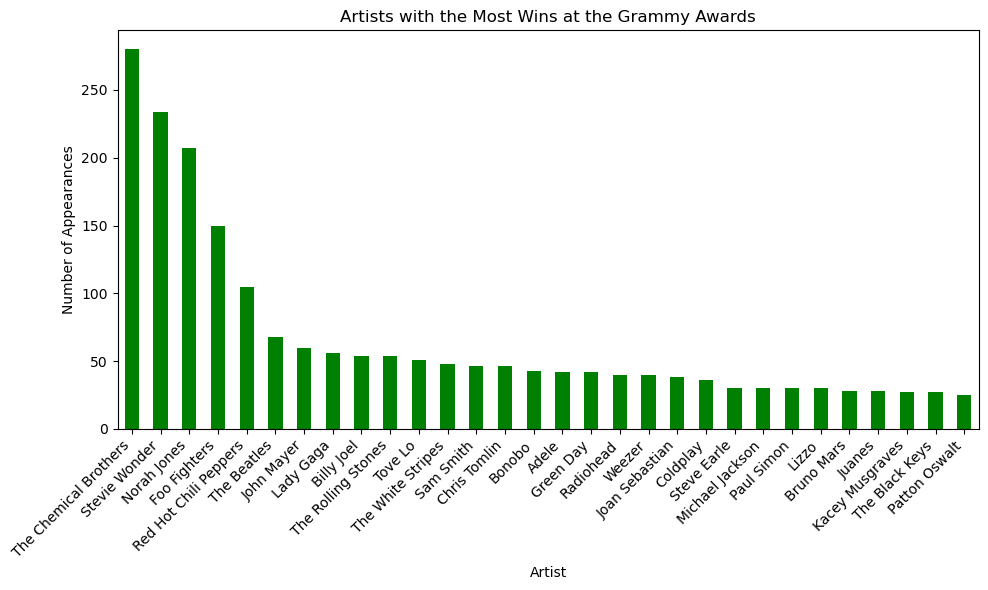

In [11]:
artist_win_counts = merged_df['artist'].value_counts().head(30)

plt.figure(figsize=(10, 6))
artist_win_counts.plot(kind='bar', color='green')
plt.title('Artists with the Most Wins at the Grammy Awards')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## The top winners are The Chemical Brothers, Stevie Wonder, Norah Jones, Foo Fighters, Red Hot Chili Peppers, and The Beatles.
- We can see that from Lady Gaga downwards, the percentage difference decreases very little or that several artists share the same number of wins.

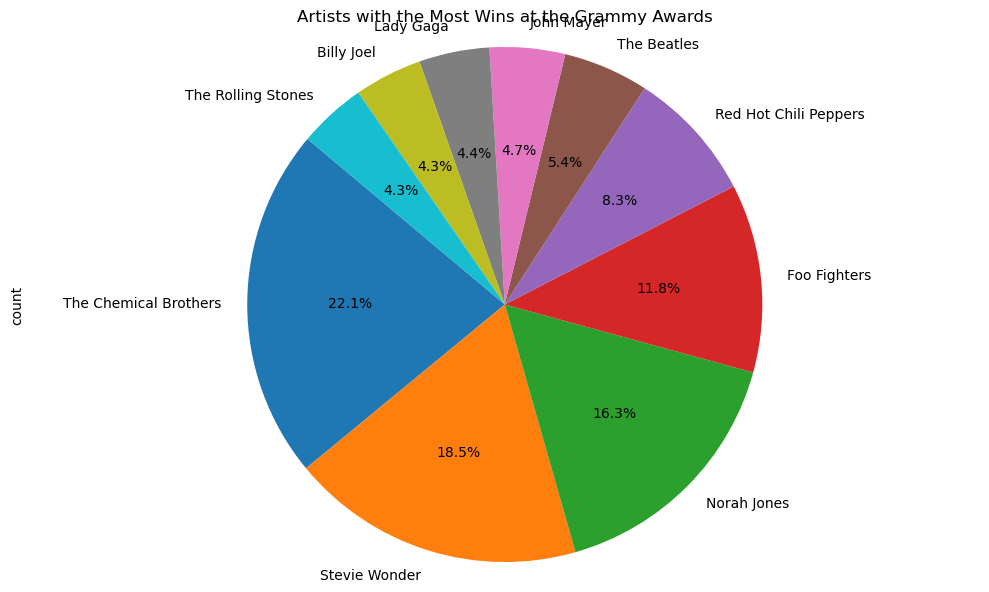

In [13]:
artist_appearance_counts = merged_df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
artist_appearance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Artists with the Most Wins at the Grammy Awards')
plt.axis('equal')  
plt.tight_layout()
plt.show()




## Exploration of the Songs with the Most Nominations at the Grammy Awards
- The song with the most nominations is "Come Away With Me", followed by "Stadium Arcadium".
- We can see a difference of 4% between the first and second place.
- Interestingly, we found three songs that have the same percentage of nominations, with a 9.4% being "Innervisions", "Fulfillingness First Finale", and "Songs in the Key of Life".


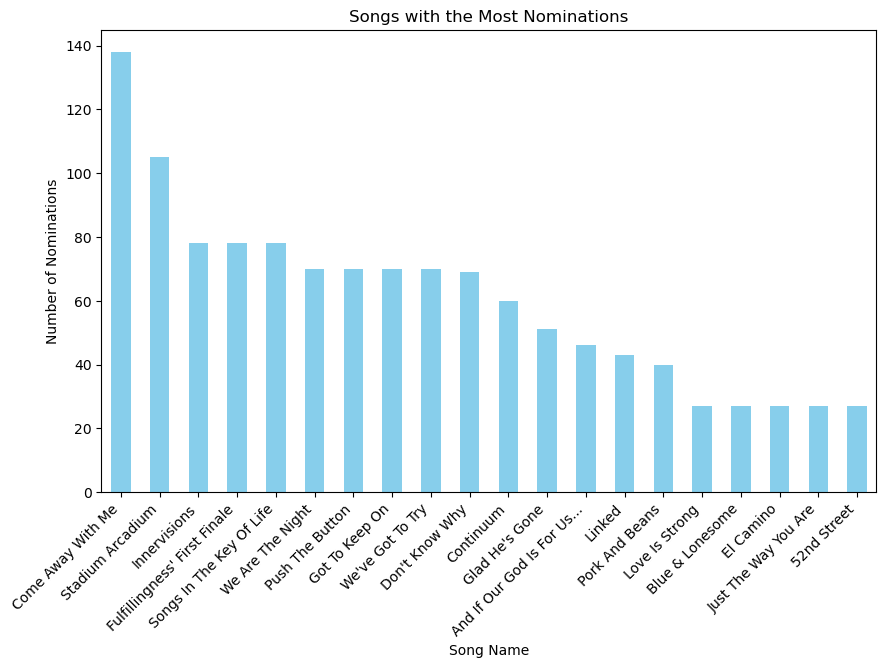

In [15]:
nominations_per_artist = merged_df['nominee'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
nominations_per_artist.plot(kind='bar', color='skyblue')
plt.title('Songs with the Most Nominations')
plt.xlabel('Song Name')
plt.ylabel('Number of Nominations')
plt.xticks(rotation=45, ha='right')
plt.show()



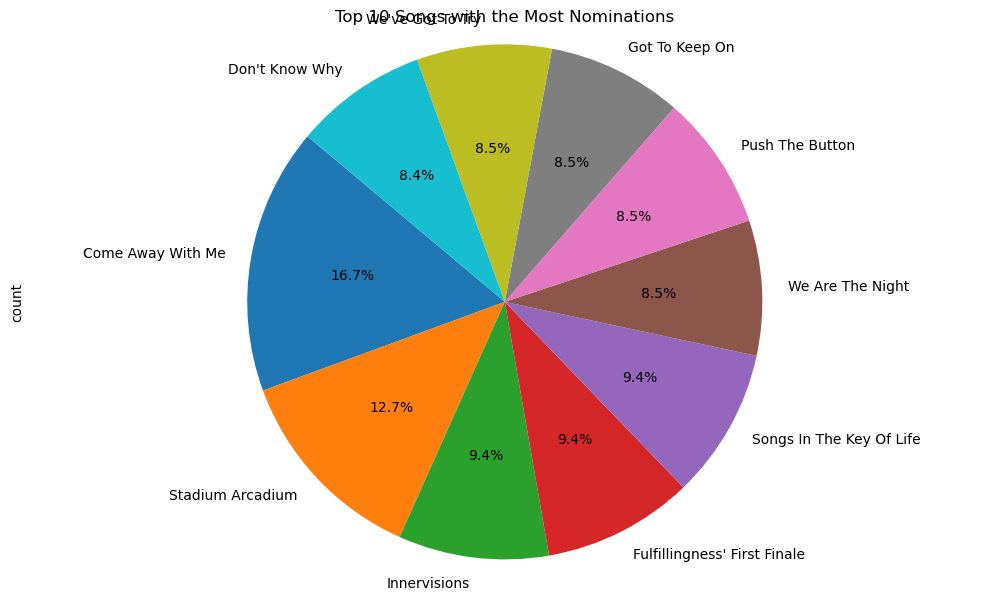

In [16]:
plt.figure(figsize=(10, 6))
nominations_per_artist.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Songs with the Most Nominations')
plt.axis('equal')  
plt.tight_layout()
plt.show()


## Analysis of the Dataset by Music Genre
- First, we want to see how the unique values for each music genre are distributed and the number of times they appear in the dataset, so we can anticipate future behavior in the graphics related to this field.

In [17]:
genre_records = merged_df['track_genre'].value_counts()
print("Count of records per music genre:")
print(genre_records)


Count of records per music genre:
track_genre
breakbeat            248
soul                 181
jazz                 129
british              127
pop                  120
funk                 119
j-pop                112
dance                104
grunge                96
alt-rock              90
rock                  85
indie                 82
country               77
bluegrass             76
songwriter            70
singer-songwriter     70
metal                 63
blues                 58
hip-hop               57
alternative           56
punk                  53
piano                 52
psych-rock            47
r-n-b                 46
world-music           44
salsa                 43
folk                  37
trip-hop              36
synth-pop             34
electro               33
power-pop             30
latin                 28
garage                28
comedy                25
electronic            25
disco                 21
punk-rock             19
swedish               16
acou

## Music Genres with the Most Wins at the Grammy Awards
- The most frequent music genre in our dataset is breakbeat, followed by soul.
- After the first two most frequent genres, the difference in the number of records starts to be very small, which we can analyze with the graph.
- The least frequent genre in our dataset is sleep and reggae, with only 1 record each.

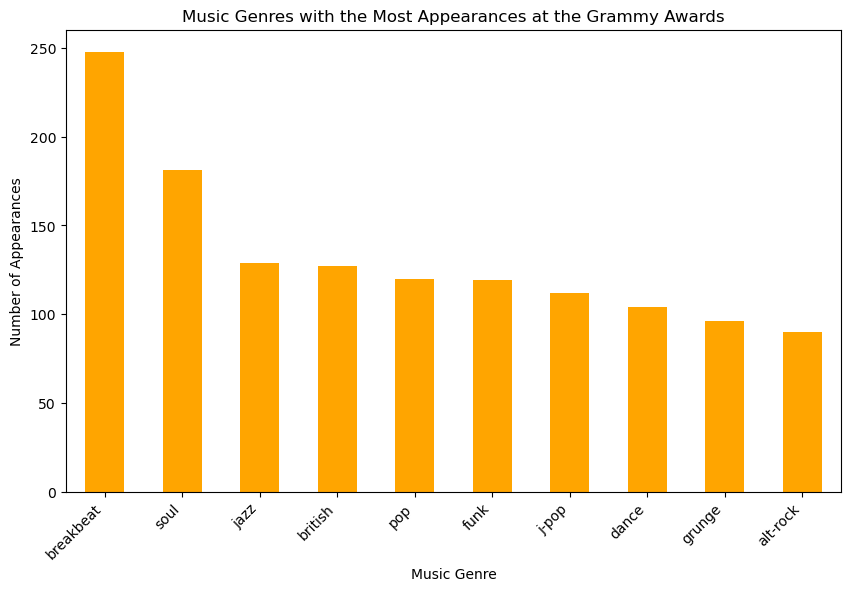

In [18]:
genre_count = merged_df['track_genre'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar', color='orange')
plt.title('Music Genres with the Most Appearances at the Grammy Awards')
plt.xlabel('Music Genre')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.show()



## Distribution of Songs by Category
- We have the category of Album of the Year leading with the highest number of songs with a difference of around 200 records with the second place, which is for Best Rock Album.
- We can analyze the categories that are more competitive in the Grammys.

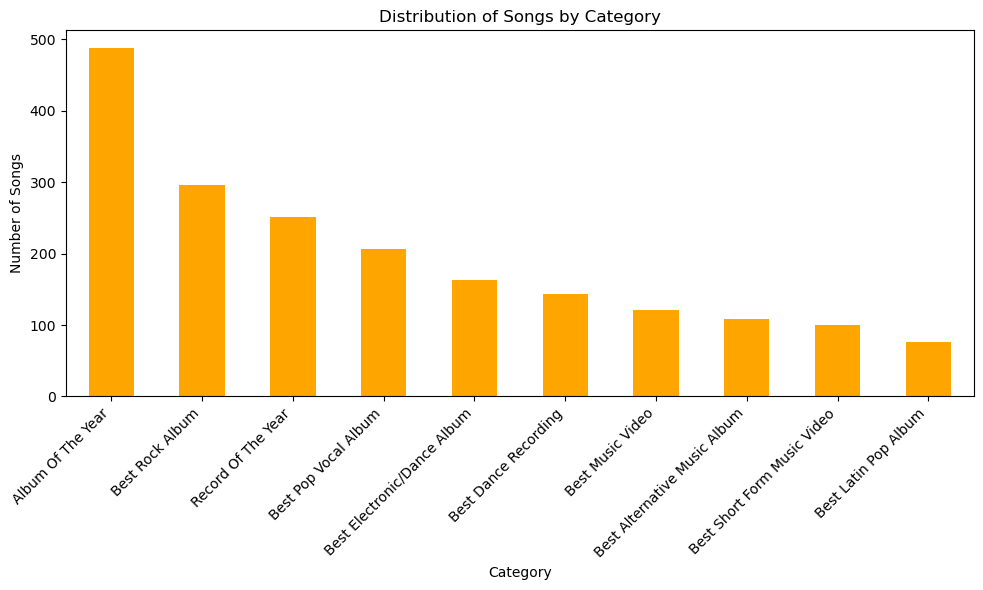

In [19]:
winners_per_category = merged_df['category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
winners_per_category.plot(kind='bar', color='orange')
plt.title('Distribution of Songs by Category')
plt.xlabel('Category')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Save dataset in the database

In [20]:
load_dotenv()

True

In [21]:
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_database = os.getenv("DB_DATABASE")

In [23]:
try:
    Workshop_2_mysql_connection_str = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_database}'
    Workshop_2_mysql_db_connection = create_engine(Workshop_2_mysql_connection_str)
    print("Connection established with the database...")

    table_name = 'workshop_002_merged'

    merged_df.to_sql(table_name, con=Workshop_2_mysql_db_connection, index=False, if_exists='replace')

    print("Data saved to the 'workshop_002_merged' table successfully.")

except Exception as e:
    print(f"Failed to connect to the MySQL database: {e}")

finally:
    if 'Workshop_2_mysql_db_connection' in locals():
        Workshop_2_mysql_db_connection.dispose()
    print("Connection closed.")



Connection established with the database...
Data saved to the 'workshop_002_merged' table successfully.
Connection closed.
